## TRAVEL AGGREGATOR ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bookings_data = pd.read_csv('Bookings.csv')
sessions_data = pd.read_csv('Sessions.csv')

<b>1. Find the number of distinct bookings, sessions, and searches from the given data sets.

In [3]:
# Distinct Bookings
num_distinct_bookings = bookings_data['booking_id'].nunique()
# Distinct Sessions
num_distinct_sessions = sessions_data['session_id'].nunique()
# Distinct Searches
num_distinct_searches = sessions_data['search_id'].nunique()

print(f'Distinct Bookings: {num_distinct_bookings}')
print(f'Distinct Sessions: {num_distinct_sessions}')
print(f'Distinct Searches: {num_distinct_searches}')

Distinct Bookings: 339
Distinct Sessions: 331
Distinct Searches: 1360


<b>2. How many sessions have more than one booking?

In [4]:
session_bookings = sessions_data.groupby('session_id')['booking_id'].nunique()

# Filter sesssions with more than one booking
sessions_with_multiple_bookings = session_bookings[session_bookings > 1]
print(sessions_with_multiple_bookings)

# Get total count
total_sessions = len(sessions_with_multiple_bookings)
print(f'Total Sessions with more than one booking: {total_sessions}')

session_id
session_134    2
session_154    2
session_196    2
session_231    2
session_27     2
session_290    2
session_298    2
session_324    2
session_50     2
session_76     2
Name: booking_id, dtype: int64
Total Sessions with more than one booking: 10


<b>3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week ?

Day With Highest Bookings: Thursday


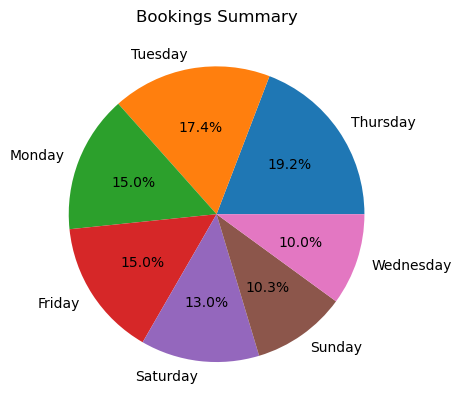

In [7]:
bookings_data['booking_time'] = pd.to_datetime(bookings_data['booking_time'])
bookings_data['booking_day'] = bookings_data['booking_time'].apply(lambda x:x.day_name())
booking_day_info = bookings_data['booking_day'].value_counts()
booking_day_info = booking_day_info.to_csv('booking_day_info.csv')
num_high_bookings = pd.read_csv('booking_day_info.csv')
weekday = num_high_bookings['booking_day']
print(f'Day With Highest Bookings: {weekday[0]}')
weekday_info = num_high_bookings['count']

plt.pie(weekday_info, labels=weekday, autopct='%.1f%%')
plt.title('Bookings Summary')
plt.show()

<b>4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [8]:
# Group by service name and count bookings
booking_counts = bookings_data.groupby('service_name')['booking_id'].count()

# Calculate the total Gross Booking value (Sum of INR_Amount)
gross_booking_value = bookings_data.groupby('service_name')['INR_Amount'].sum()

# Combine the results into a DataFrame
result_data = pd.DataFrame({'Total Bookings':booking_counts,
                           'Total Gross Booking Value (INR)':gross_booking_value})
print(result_data)

              Total Bookings  Total Gross Booking Value (INR)
service_name                                                 
GOIBIBO                  186                       5897637.97
MMT                       48                        665669.08
YATRA                    105                       3378702.13


<b>5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [9]:
# Group by customer ID and count bookings
booking_counts = bookings_data.groupby('customer_id')['booking_id'].count()

# Filter customers with more than one booking
multi_booking_customers = booking_counts[booking_counts > 1]

# Get the bookings for multi-booking customers
multi_booking_data = bookings_data[bookings_data['customer_id'].isin(multi_booking_customers.index)]

# Group by route (from city to city) and count bookings
route_counts = multi_booking_data.groupby(['from_city','to_city'])['booking_id'].count()

# Find the most booked route
most_booked_route = route_counts.idxmax()

print(f'Most Booked Route: {most_booked_route}')

Most Booked Route: ('Gurgaon', 'Roissy-en-France')


<b>6. Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [10]:
# Group by departure city and count departures
departure_counts = bookings_data.groupby('from_city')['booking_id'].count()

# Filter cities with at least 5 departures
popular_departures = departure_counts[departure_counts >= 5]

# Sort by departure count in ascending order
sorted_departures = popular_departures.sort_values(ascending=False)

# Get the top 3 departure cities
top_3_cities = sorted_departures.index[:3]

print(f"Top 3 Departure Cities for Advance Bookings: {', '.join(top_3_cities)}")

Top 3 Departure Cities for Advance Bookings: Gurgaon, Mumbai, Delhi


<B>7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation?

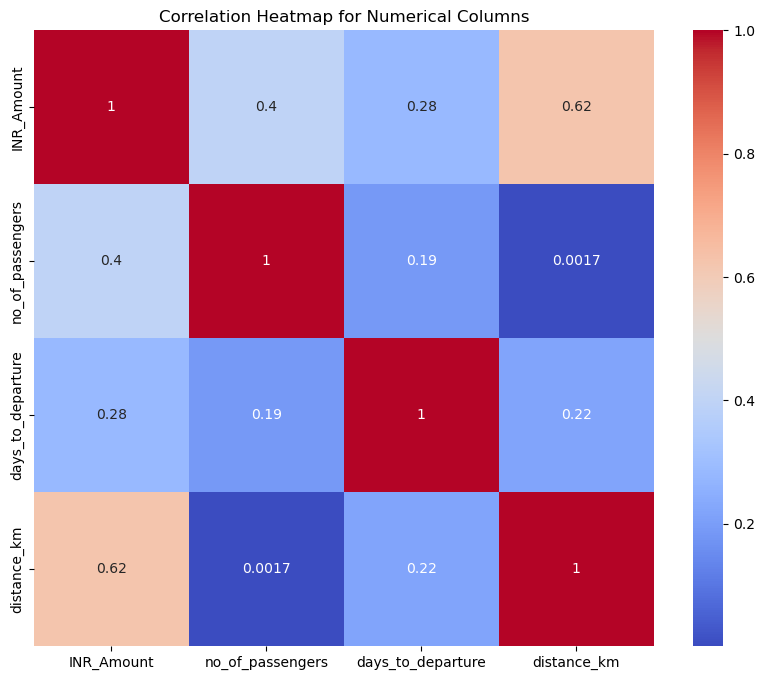

The pair of numerical columns with the maximum correlation is: ('INR_Amount', 'INR_Amount')


In [13]:
# Select only numerical columns for correlation
numerical_columns = bookings_data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

# Find the pair of columns with maximum correlation
max_corr_pair = correlation_matrix.unstack().idxmax()

print(f'The pair of numerical columns with the maximum correlation is: {max_corr_pair}')

<b>8. For each service, which is the most used device type for making bookings on the platform?

In [19]:
# Group by service name and count device types
device_counts = bookings_data.groupby('service_name')['device_type_used'].value_counts()

# Get the most used device type for each service
most_used_devices = device_counts.groupby('service_name').idxmax()

print(f'Most used device type for each service:')
for service, device in most_used_devices.items():
    print(f'{service}: {device[1]}')

Most used device type for each service:
GOIBIBO: IOS
MMT: Desktop
YATRA: Desktop


<b>9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

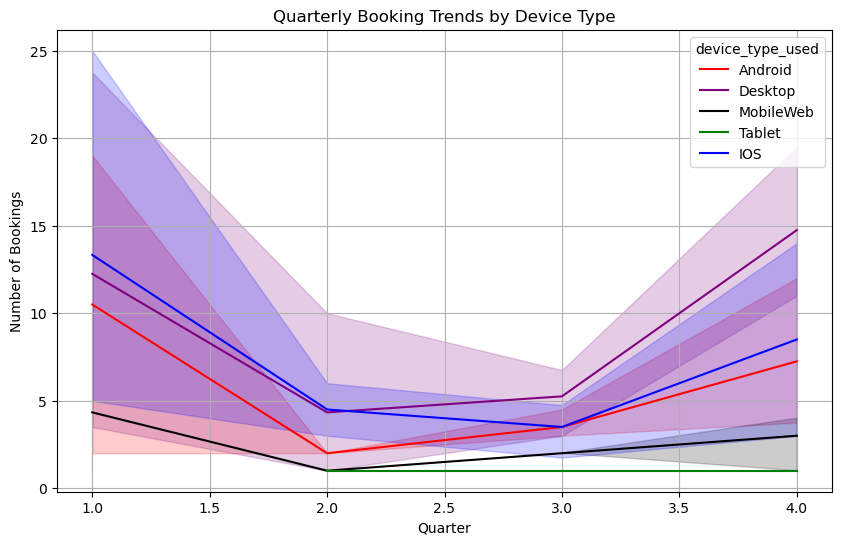

In [30]:
# Convert booking_time to datetime
bookings_data['booking_time'] = pd.to_datetime(bookings_data['booking_time'])

# Extract year and quarter
bookings_data['year'] = bookings_data['booking_time'].dt.year
bookings_data['quarter'] = bookings_data['booking_time'].dt.quarter

# Group by year, quarter and device type
booking_counts = bookings_data.groupby(['year','quarter','device_type_used']).size().reset_index(name='count')

# Create time series plots
plt.figure(figsize=(10,6))
sns.lineplot(x='quarter', y='count', hue='device_type_used', palette=['red','purple','black','green','blue'], data=booking_counts)
plt.xlabel('Quarter')
plt.ylabel('Number of Bookings')
plt.title('Quarterly Booking Trends by Device Type')
plt.grid(True)
plt.show()

<b>10. Consider the following example:

<b>12 customers performed a total of 100 searches but only a few of them performed
<b>10 bookings in total.

<b>Searches = 100 bookings = 10 customers = 12

<b>The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above
<b>information/context, answer the following:

<b>• What is the average oBSR for each month of the year?

<b>• What is the average oBSR for each day of the week?

<b>• Plot a time series of oBSR on all the given dates.

In [34]:
# Covert the search time column to date time
sessions_data['search_time'] = pd.to_datetime(sessions_data['search_time'], format='mixed')

# Extract year and month
sessions_data['year'] = sessions_data['search_time'].dt.year
sessions_data['month'] = sessions_data['search_time'].dt.month
sessions_data['day_of_week'] = sessions_data['search_time'].dt.dayofweek

# Calculate the total searches and bookings
total_searches = sessions_data['search_id'].nunique()
total_bookings = sessions_data['booking_id'].nunique()

# Calculate the overall bookings to search ratio(oBSR)
oBSR = total_bookings / total_searches
print(f'Overall booking to search ratio (oBSR): {round(oBSR, 2)}')

# Calculate the average oBSR for each month
avg_oBSR_monthly = sessions_data.groupby(['year','month'])['booking_id'].nunique() / sessions_data.groupby(['year','month'])['search_id'].nunique()
print('Average oBSR for each month:')
print(avg_oBSR_monthly)

# Calculate the average oBSR for each day of the week
avg_oBSR_daily = sessions_data.groupby('day_of_week')['booking_id'].nunique() / sessions_data.groupby('day_of_week')['search_id'].nunique()
print('Average oBSR for each day of the week:')
print(avg_oBSR_daily)


Overall booking to search ratio (oBSR): 0.25
Average oBSR for each month:
year  month
2018  9        0.387097
      10       0.095238
      11       0.243902
      12       0.193548
2019  1        0.333333
      6        1.000000
      7        0.217391
      8        0.285714
      9        0.304348
      10       0.214286
      11       0.285714
      12       0.219298
2020  1        0.226027
      2        0.306452
      3        0.300000
      5        0.111111
      6        0.333333
      7        0.100000
      8        0.666667
      9        0.375000
      10       0.545455
      11       0.407407
      12       0.666667
2021  1        0.571429
      2        0.363636
      3        0.312500
      4        0.258065
      5        0.500000
      6        0.428571
      7        0.117647
      8        0.210526
      9        0.521739
      10       0.300000
      11       0.147059
      12       0.300000
2022  1        0.350000
      2        0.275862
      3        0.179487
  

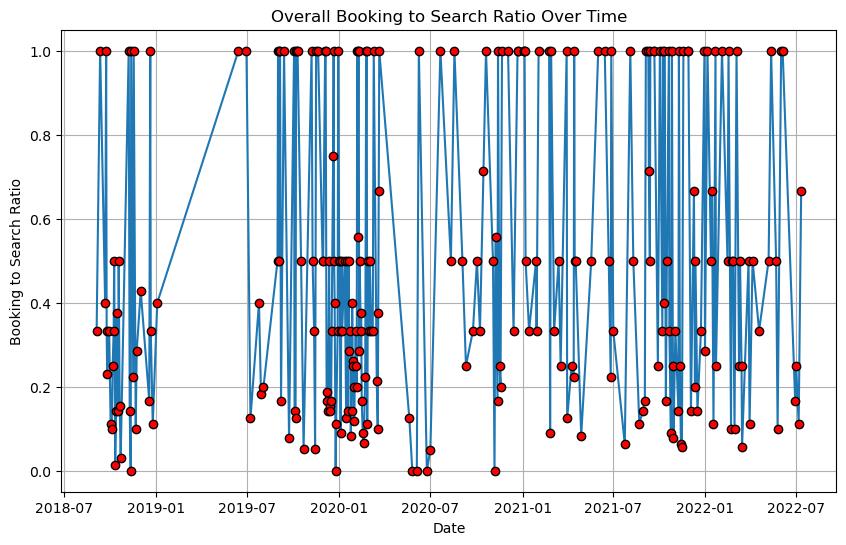

In [46]:
# Convert the 'search_time' column to datetime
sessions_data['search_time'] = pd.to_datetime(sessions_data['search_time'],format='mixed')

# Extract the date from search time column
sessions_data['search_date'] = sessions_data['search_time'].dt.date

# Calculate total bookings and total searches per day
daily_total = sessions_data.groupby('search_date').agg({'booking_id':'count','search_id':'count'})

# Calculate the overall bookings to search ratio
daily_total['booking_to_search_ratio'] = daily_total['booking_id'] / daily_total['search_id']

plt.figure(figsize=(10, 6))
plt.plot(daily_total.index, daily_total['booking_to_search_ratio'], marker='o', markerfacecolor='red', markeredgecolor='black')

plt.xlabel('Date')
plt.ylabel('Booking to Search Ratio')
plt.title('Overall Booking to Search Ratio Over Time')
plt.grid(True)
plt.show()
